In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
import zipfile
import os

os.makedirs("plant_dataset/train", exist_ok=True)
os.makedirs("plant_dataset/validation", exist_ok=True)

with zipfile.ZipFile("Plant_Valid_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("plant_dataset/train")

with zipfile.ZipFile("Plant_train_ZipN.zip", 'r') as zip_ref:
    zip_ref.extractall("plant_dataset/validation")

In [3]:
 import os

print("Train Classes:", os.listdir("plant_dataset/train"))
print("Validation Classes:", os.listdir("plant_dataset/validation"))


Train Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotte

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'plant_dataset/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    'plant_dataset/validation',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 17572 images belonging to 38 classes.
Found 73334 images belonging to 38 classes.


In [5]:
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
MaxPooling2D(2, 2),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D(2, 2),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D(2, 2),
Flatten(),
Dense(256, activation='relu'),
Dropout(0.5),
Dense(train_generator.num_classes, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001),
loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary()

C:\Users\jaini\.conda\envs\plant-disease-predict\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,525,798 (24.89 MB)

 Trainable params: 6,525,798 (24.89 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs = 3
history = model.fit(
train_generator,
steps_per_epoch=train_generator.samples // batch_size,
validation_data=validation_generator,
validation_steps=validation_generator.samples // batch_size,
epochs=epochs)

C:\Users\jaini\.conda\envs\plant-disease-predict\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
549/549 ━━━━━━━━━━━━━━━━━━━━ 4407s 8s/step - accuracy: 0.1082 - loss: 3.3692 - val_accuracy: 0.4593 - val_loss: 2.2016
Epoch 2/3
  1/549 ━━━━━━━━━━━━━━━━━━━━ 22:42 2s/step - accuracy: 0.2188 - loss: 2.7061

C:\Users\jaini\.conda\envs\plant-disease-predict\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


549/549 ━━━━━━━━━━━━━━━━━━━━ 1921s 4s/step - accuracy: 0.2188 - loss: 2.7061 - val_accuracy: 0.4676 - val_loss: 2.1833
Epoch 3/3
549/549 ━━━━━━━━━━━━━━━━━━━━ 3272s 6s/step - accuracy: 0.3685 - loss: 2.2523 - val_accuracy: 0.5878 - val_loss: 1.7598


In [7]:
model.save('Plant_disease_model.h5')

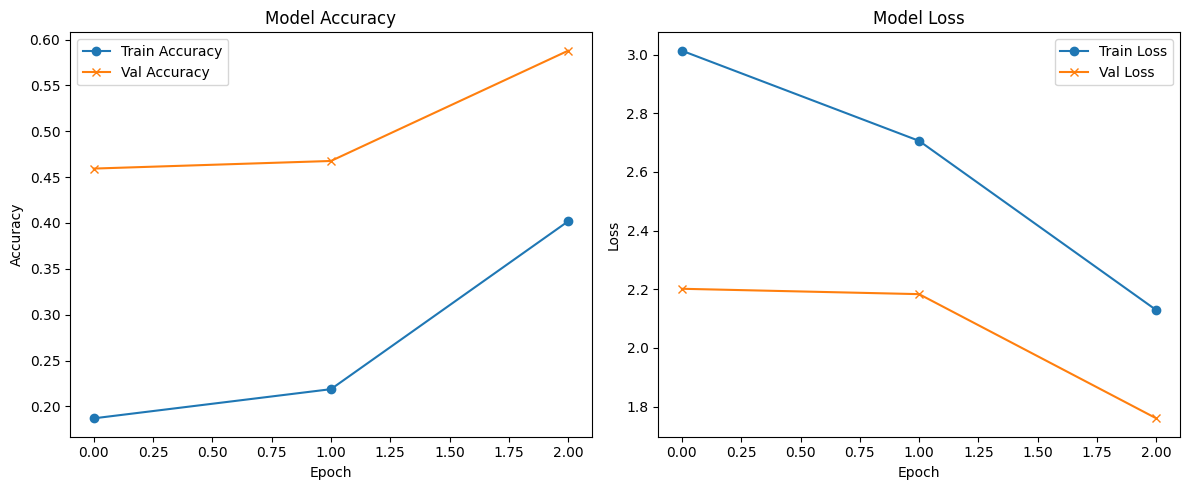

In [8]:
plt.figure(figsize=(12, 5))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model('Plant_disease_model.h5')
# Get class labels from train_generator
labels = list(train_generator.class_indices.keys())

img_width, img_height = 128, 128

def predict_disease_with_img(img):
    img_resized = img.resize((img_width, img_height))
    img_array = image.img_to_array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    result = f"Prediction: {predicted_class}\nConfidence: {confidence:.2f}%"
    return img, result

interface = gr.Interface(
fn=predict_disease_with_img,
inputs=gr.Image(type="pil"),
outputs=[gr.Image(), "text"],
title="Plant Disease Detection",
description="Upload a leaf image to get a disease prediction."
)
interface.launch()

C:\Users\jaini\.conda\envs\plant-disease-predict\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model('Plant_disease_model.h5')
# Get class labels from train_generator
labels = list(train_generator.class_indices.keys())

img_width, img_height = 128, 128
# Prediction function
def predict_disease(image):
    img = image.resize((img_width, img_height))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    predicted_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_index]
    confidence = prediction[predicted_index]

    # Clean label
    readable_label = predicted_class.replace("___", " - ").replace("_", " ")

    # Disease solutions (you can expand this)
    disease_solutions = {
        "Tomato - Tomato Yellow Leaf Curl Virus": "Remove infected plants. Use insect-proof nets and resistant varieties.",
        "Tomato - Late Blight": "Apply fungicides like Mancozeb. Improve air circulation and avoid overhead watering.",
        "Tomato - Healthy": "No disease detected. Maintain good irrigation and nutrient schedule.",
        # Add more here as needed
    }
     solution = disease_solutions.get(readable_label, "No specific solution available.")

    # Plot confidence
    fig, ax = plt.subplots()
    ax.barh(class_labels, prediction)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Confidence")
    ax.set_title("Prediction Probabilities")
    plt.tight_layout()

    return readable_label, f"{confidence * 100:.2f}%", solution, fig

    interface = gr.Interface(
    fn=predict_disease,
    inputs=gr.Image(type="pil"),
    outputs=["text", "text", "text", gr.Plot()],
    title="🌿 Plant Disease Doctor",
    description="Upload a plant leaf image to detect the disease and get solutions."
)

interface.launch()

In [10]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('Plant_disease_model.h5')

# List of class labels
class_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
                'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew',
                'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy',
                'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy',
                'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)',
                'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy',
                'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch',
                'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
                'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

# Disease solutions dictionary
disease_solutions = {
    "Apple - Apple scab": "Use fungicides like captan. Prune infected leaves and avoid overhead watering.",
    "Apple - Black rot": "Remove mummified fruits and prune infected branches. Apply appropriate fungicides.",
    "Apple - Cedar apple rust": "Remove nearby junipers. Apply fungicides during early spring.",
    "Apple - healthy": "No disease detected. Continue routine monitoring.",
    "Blueberry - healthy": "No disease detected. Maintain healthy soil and water balance.",
    "Cherry (including sour) - healthy": "No disease detected.",
    "Cherry (including sour) - Powdery mildew": "Use sulfur-based fungicides. Ensure proper air circulation.",
    "Corn (maize) - Cercospora leaf spot Gray leaf spot": "Use resistant hybrids and crop rotation. Apply fungicide if severe.",
    "Corn (maize) - Common rust": "Use resistant varieties. Apply fungicide if needed.",
    "Corn (maize) - healthy": "No disease detected.",
    "Corn (maize) - Northern Leaf Blight": "Use resistant varieties. Remove debris after harvest.",
    "Grape - Black rot": "Prune infected leaves and apply fungicides like mancozeb.",
    "Grape - Esca (Black Measles)": "No cure. Remove and destroy infected vines.",
    "Grape - healthy": "No disease detected.",
    "Grape - Leaf blight (Isariopsis Leaf Spot)": "Use protective fungicides. Ensure good air flow.",
    "Orange - Haunglongbing (Citrus greening)": "No cure. Remove infected trees. Control psyllids (insect vector).",
    "Peach - Bacterial spot": "Use copper-based bactericides. Avoid overhead irrigation.",
    "Peach - healthy": "No disease detected.",
    "Pepper, bell - Bacterial spot": "Use certified disease-free seeds. Apply copper sprays.",
    "Pepper, bell - healthy": "No disease detected.",
    "Potato - Early blight": "Apply fungicides and rotate crops regularly.",
    "Potato - healthy": "No disease detected.",
    "Potato - Late blight": "Use fungicides like mancozeb or chlorothalonil. Destroy infected plants.",
    "Raspberry - healthy": "No disease detected.",
    "Soybean - healthy": "No disease detected.",
    "Squash - Powdery mildew": "Apply sulfur-based fungicides. Avoid overhead watering.",
    "Strawberry - healthy": "No disease detected.",
    "Strawberry - Leaf scorch": "Remove infected leaves. Improve air circulation. Use fungicides.",
    "Tomato - Bacterial spot": "Avoid working with wet plants. Use copper sprays.",
    "Tomato - Early blight": "Use crop rotation. Apply fungicide regularly.",
    "Tomato - healthy": "No disease detected.",
    "Tomato - Late blight": "Use resistant varieties and apply fungicides like chlorothalonil.",
    "Tomato - Leaf Mold": "Improve ventilation. Apply fungicides like mancozeb.",
    "Tomato - Septoria leaf spot": "Remove infected leaves. Use fungicide like chlorothalonil.",
    "Tomato - Spider mites Two-spotted spider mite": "Spray insecticidal soap. Remove infested leaves.",
    "Tomato - Target Spot": "Use crop rotation. Apply fungicides.",
    "Tomato - Tomato mosaic virus": "Remove infected plants. Avoid handling healthy plants after infected ones.",
    "Tomato - Tomato Yellow Leaf Curl Virus": "Use resistant seeds. Control whiteflies using insecticides."
}

# Image dimensions
img_width, img_height = 128, 128

# Prediction function
def predict_disease(img):
    img = img.resize((img_width, img_height))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    predicted_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_index]
    confidence = prediction[predicted_index]

    # Clean label for readability
    readable_label = predicted_class.replace("___", " - ").replace("_", " ")

    # Get solution
    solution = disease_solutions.get(readable_label, "No specific solution available.")

    # Plot confidence
    fig, ax = plt.subplots()
    ax.barh([label.replace("___", " - ").replace("_", " ") for label in class_labels], prediction)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Confidence")
    ax.set_title("Prediction Probabilities")
    plt.tight_layout()

    return readable_label, f"{confidence * 100:.2f}%", solution, fig

# Gradio interface
interface = gr.Interface(
    fn=predict_disease,
    inputs=gr.Image(type="pil"),
    outputs=["text", "text", "text", gr.Plot()],
    title="🌿 Plant Disease Doctor",
    description="Upload a plant leaf image to detect the disease, see the confidence score, and get a suggested treatment."
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


In [11]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('Plant_disease_model.h5')

# List of class labels
class_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
                'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew',
                'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy',
                'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy',
                'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)',
                'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy',
                'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch',
                'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
                'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

# Disease solutions dictionary
disease_solutions = {
    "Apple - Apple scab": "Use fungicides like captan. Prune infected leaves and avoid overhead watering.",
    "Apple - Black rot": "Remove mummified fruits and prune infected branches. Apply appropriate fungicides.",
    "Apple - Cedar apple rust": "Remove nearby junipers. Apply fungicides during early spring.",
    "Apple - healthy": "No disease detected. Continue routine monitoring.",
    "Blueberry - healthy": "No disease detected. Maintain healthy soil and water balance.",
    "Cherry (including sour) - healthy": "No disease detected.",
    "Cherry (including sour) - Powdery mildew": "Use sulfur-based fungicides. Ensure proper air circulation.",
    "Corn (maize) - Cercospora leaf spot Gray leaf spot": "Use resistant hybrids and crop rotation. Apply fungicide if severe.",
    "Corn (maize) - Common rust": "Use resistant varieties. Apply fungicide if needed.",
    "Corn (maize) - healthy": "No disease detected.",
    "Corn (maize) - Northern Leaf Blight": "Use resistant varieties. Remove debris after harvest.",
    "Grape - Black rot": "Prune infected leaves and apply fungicides like mancozeb.",
    "Grape - Esca (Black Measles)": "No cure. Remove and destroy infected vines.",
    "Grape - healthy": "No disease detected.",
    "Grape - Leaf blight (Isariopsis Leaf Spot)": "Use protective fungicides. Ensure good air flow.",
    "Orange - Haunglongbing (Citrus greening)": "No cure. Remove infected trees. Control psyllids (insect vector).",
    "Peach - Bacterial spot": "Use copper-based bactericides. Avoid overhead irrigation.",
    "Peach - healthy": "No disease detected.",
    "Pepper, bell - Bacterial spot": "Use certified disease-free seeds. Apply copper sprays.",
    "Pepper, bell - healthy": "No disease detected.",
    "Potato - Early blight": "Apply fungicides and rotate crops regularly.",
    "Potato - healthy": "No disease detected.",
    "Potato - Late blight": "Use fungicides like mancozeb or chlorothalonil. Destroy infected plants.",
    "Raspberry - healthy": "No disease detected.",
    "Soybean - healthy": "No disease detected.",
    "Squash - Powdery mildew": "Apply sulfur-based fungicides. Avoid overhead watering.",
    "Strawberry - healthy": "No disease detected.",
    "Strawberry - Leaf scorch": "Remove infected leaves. Improve air circulation. Use fungicides.",
    "Tomato - Bacterial spot": "Avoid working with wet plants. Use copper sprays.",
    "Tomato - Early blight": "Use crop rotation. Apply fungicide regularly.",
    "Tomato - healthy": "No disease detected.",
    "Tomato - Late blight": "Use resistant varieties and apply fungicides like chlorothalonil.",
    "Tomato - Leaf Mold": "Improve ventilation. Apply fungicides like mancozeb.",
    "Tomato - Septoria leaf spot": "Remove infected leaves. Use fungicide like chlorothalonil.",
    "Tomato - Spider mites Two-spotted spider mite": "Spray insecticidal soap. Remove infested leaves.",
    "Tomato - Target Spot": "Use crop rotation. Apply fungicides.",
    "Tomato - Tomato mosaic virus": "Remove infected plants. Avoid handling healthy plants after infected ones.",
    "Tomato - Tomato Yellow Leaf Curl Virus": "Use resistant seeds. Control whiteflies using insecticides."
}

# Image dimensions
img_width, img_height = 128, 128

# Prediction function
def predict_disease(img):
    img = img.resize((img_width, img_height))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    predicted_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_index]
    confidence = prediction[predicted_index]

    # Clean label for readability
    readable_label = predicted_class.replace("___", " - ").replace("_", " ")

    # Get solution
    solution = disease_solutions.get(readable_label, "No specific solution available.")

    # Plot confidence
    fig, ax = plt.subplots()
    ax.barh([label.replace("___", " - ").replace("_", " ") for label in class_labels], prediction)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Confidence")
    ax.set_title("Prediction Probabilities")
    plt.tight_layout()

    return readable_label, f"{confidence * 100:.2f}%", solution, fig

interface = gr.Interface(
    fn=predict_disease,
    inputs=gr.Image(type="pil", label="📷 Upload Leaf Image"),
    outputs=[
        gr.Textbox(label="🦠 Detected Disease"),
        gr.Textbox(label="📊 Confidence"),
        gr.Textbox(label="💡 Suggested Solution"),
        gr.Plot(label="📉 Prediction Probabilities")
    ],
    title="🌿 Plant Disease Doctor",
    description="Upload a plant leaf image to detect the disease, check prediction confidence, and get a treatment recommendation."
)


interface.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


In [1]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('Plant_disease_model.h5')

# List of class labels
class_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
                'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew',
                'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy',
                'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy',
                'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)',
                'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy',
                'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch',
                'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
                'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

# Disease solutions dictionary
disease_solutions = {
    "Apple - Apple scab": "Use fungicides like captan. Prune infected leaves and avoid overhead watering.",
    "Apple - Black rot": "Remove mummified fruits and prune infected branches. Apply appropriate fungicides.",
    "Apple - Cedar apple rust": "Remove nearby junipers. Apply fungicides during early spring.",
    "Apple - healthy": "No disease detected. Continue routine monitoring.",
    "Blueberry - healthy": "No disease detected. Maintain healthy soil and water balance.",
    "Cherry (including sour) - healthy": "No disease detected.",
    "Cherry (including sour) - Powdery mildew": "Use sulfur-based fungicides. Ensure proper air circulation.",
    "Corn (maize) - Cercospora leaf spot Gray leaf spot": "Use resistant hybrids and crop rotation. Apply fungicide if severe.",
    "Corn (maize) - Common rust": "Use resistant varieties. Apply fungicide if needed.",
    "Corn (maize) - healthy": "No disease detected.",
    "Corn (maize) - Northern Leaf Blight": "Use resistant varieties. Remove debris after harvest.",
    "Grape - Black rot": "Prune infected leaves and apply fungicides like mancozeb.",
    "Grape - Esca (Black Measles)": "No cure. Remove and destroy infected vines.",
    "Grape - healthy": "No disease detected.",
    "Grape - Leaf blight (Isariopsis Leaf Spot)": "Use protective fungicides. Ensure good air flow.",
    "Orange - Haunglongbing (Citrus greening)": "No cure. Remove infected trees. Control psyllids (insect vector).",
    "Peach - Bacterial spot": "Use copper-based bactericides. Avoid overhead irrigation.",
    "Peach - healthy": "No disease detected.",
    "Pepper, bell - Bacterial spot": "Use certified disease-free seeds. Apply copper sprays.",
    "Pepper, bell - healthy": "No disease detected.",
    "Potato - Early blight": "Apply fungicides and rotate crops regularly.",
    "Potato - healthy": "No disease detected.",
    "Potato - Late blight": "Use fungicides like mancozeb or chlorothalonil. Destroy infected plants.",
    "Raspberry - healthy": "No disease detected.",
    "Soybean - healthy": "No disease detected.",
    "Squash - Powdery mildew": "Apply sulfur-based fungicides. Avoid overhead watering.",
    "Strawberry - healthy": "No disease detected.",
    "Strawberry - Leaf scorch": "Remove infected leaves. Improve air circulation. Use fungicides.",
    "Tomato - Bacterial spot": "Avoid working with wet plants. Use copper sprays.",
    "Tomato - Early blight": "Use crop rotation. Apply fungicide regularly.",
    "Tomato - healthy": "No disease detected.",
    "Tomato - Late blight": "Use resistant varieties and apply fungicides like chlorothalonil.",
    "Tomato - Leaf Mold": "Improve ventilation. Apply fungicides like mancozeb.",
    "Tomato - Septoria leaf spot": "Remove infected leaves. Use fungicide like chlorothalonil.",
    "Tomato - Spider mites Two-spotted spider mite": "Spray insecticidal soap. Remove infested leaves.",
    "Tomato - Target Spot": "Use crop rotation. Apply fungicides.",
    "Tomato - Tomato mosaic virus": "Remove infected plants. Avoid handling healthy plants after infected ones.",
    "Tomato - Tomato Yellow Leaf Curl Virus": "Use resistant seeds. Control whiteflies using insecticides."
}

# Image dimensions
img_width, img_height = 128, 128

# Prediction function
def predict_disease(img):
    img = img.resize((img_width, img_height))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    predicted_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_index]
    confidence = prediction[predicted_index]

    # Clean label for readability
    readable_label = predicted_class.replace("___", " - ").replace("_", " ")

    # Get solution
    solution = disease_solutions.get(readable_label, "No specific solution available.")

    # Plot confidence
    fig, ax = plt.subplots()
    ax.barh([label.replace("___", " - ").replace("_", " ") for label in class_labels], prediction)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Confidence")
    ax.set_title("Prediction Probabilities")
    plt.tight_layout()

    return readable_label, f"{confidence * 100:.2f}%", solution, fig

interface = gr.Interface(
    fn=predict_disease,
    inputs=gr.Image(type="pil", label="📷 Upload Leaf Image"),
    outputs=[
        gr.Textbox(label="🦠 Detected Disease"),
        gr.Textbox(label="📊 Confidence"),
        gr.Textbox(label="💡 Suggested Solution"),
        gr.Plot(label="📉 Prediction Probabilities")
    ],
    title="🌿 Plant Disease Doctor",
    description="Upload a plant leaf image to detect the disease, check prediction confidence, and get a treatment recommendation."
)


interface.launch()


ModuleNotFoundError: No module named 'gradio'